In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bars
import d
import signals
import u

# Data Fetching

<AxesSubplot:xlabel='Date'>

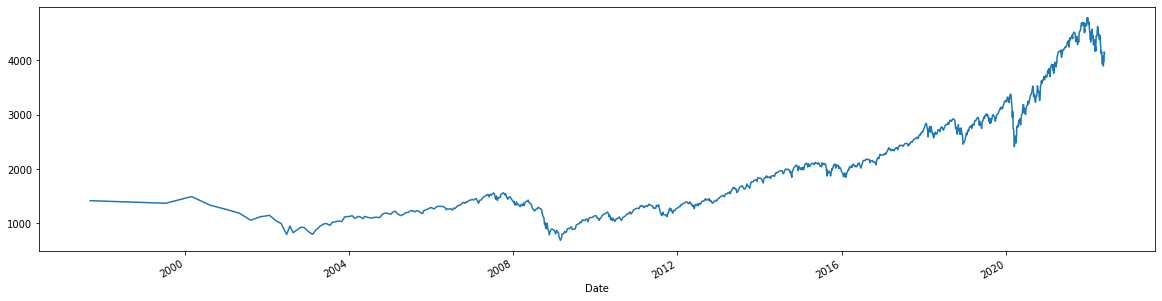

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = d.fetch("data/future/daily", "ES.csv")
data["dv"] = data["Close"] * data["Volume"]
mean_weekly_dv = np.mean(data.resample("W")["dv"].sum())
dv_bars = bars.create_dollar_volume_bars(data, mean_weekly_dv)

dv_bars["Close"].plot()

# CUSUM

In [11]:
indices = signals.get_cusum_indices_on_pct_returns(dv_bars["Close"], 0.1)

<AxesSubplot:xlabel='Date'>

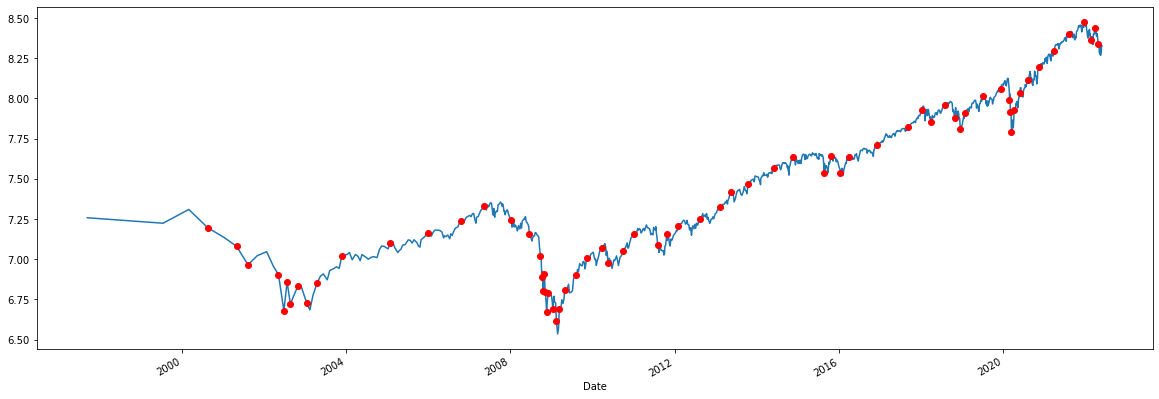

In [13]:
plt.rcParams["figure.figsize"] = (20, 7)

np.log(dv_bars["Close"]).plot.line()
(np.log(dv_bars["Close"]) * indices).replace(0, np.nan).plot(style="o", color="r")